<a href="https://colab.research.google.com/github/Sandymyatnoe/Sandymyatnoe/blob/main/CNN_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST dataset


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
train_data=datasets.MNIST(
    root="data",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)
test_data=datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 31903765.65it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1014409.36it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9126215.05it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6722134.36it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
train_data[0][0].shape, train_data[0][1]

(torch.Size([1, 28, 28]), 5)

In [ ]:
image=train_data[0][0]
label=train_data[0][1]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
class_name=train_data.classes
class_name

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

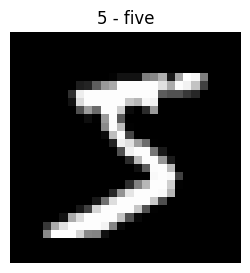

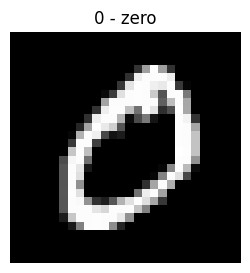

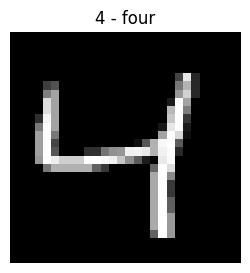

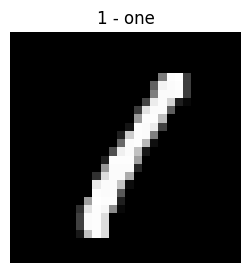

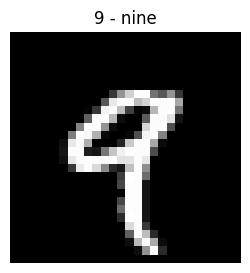

In [ ]:
for i in range(5):
  img=train_data[i][0].squeeze()
  label=train_data[i][1]
  plt.figure(figsize=(3,3))
  plt.imshow(img, cmap="gray")
  plt.title(class_name[label])
  plt.axis(False)


In [ ]:
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=32,
                            shuffle=True)

test_dataloader=DataLoader(dataset=test_data,
                           batch_size=32,
                           shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e11a31449a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e11a32fbb20>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [ ]:
for sample in next(iter(train_dataloader)):
  print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [ ]:
class MNIST_model(nn.Module):
  def __init__(self, input_shape:int, output_shape:int, hidden_units:int):
    super().__init__()

    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classification=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x=self.conv_block_1(x)
    x=self.conv_block_2(x)
    x=self.classification(x)
    return x



In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
model=MNIST_model(input_shape=1,
                  output_shape=len(class_name),
                  hidden_units=10).to(device)
model

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
#testing our model

dummy_x=torch.rand(size=(1,28,28)).unsqueeze(dim=0).to(device)
model(dummy_x).argmax(dim=1)

tensor([4])

In [ ]:
#run on cpu

%%time

from tqdm.auto import tqdm

model_cpu=MNIST_model(input_shape=1,
                      hidden_units=10,
                      output_shape=len(class_name)).to("cpu")

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_cpu.parameters(),
                          lr=0.1)

epochs=5

for epoch in tqdm(range(epochs)):
  train_loss=0
  for batch, (X,y) in enumerate(train_dataloader):
    model_cpu.train()

    X,y =X.to("cpu"), y.to("cpu")

    y_pred=model_cpu(X)

    loss=loss_fn(y_pred,y)

    train_loss+=loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss/=len(train_dataloader)

  test_loss=0

  model_cpu.eval()

  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      X_test, y_test=X_test.to("cpu"), y_test.to("cpu")
      test_pred=model_cpu(X_test)
      t_loss=loss_fn(test_pred, y_test)
      test_loss+=t_loss

    test_loss/=len(test_dataloader)

  print(f"Epoch:{epoch} | Train Loss: {train_loss:.3f} | Test Loss: {test_loss:.3f}")




  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0 | Train Loss: 0.203 | Test Loss: 0.061
Epoch:1 | Train Loss: 0.071 | Test Loss: 0.052
Epoch:2 | Train Loss: 0.057 | Test Loss: 0.054
Epoch:3 | Train Loss: 0.049 | Test Loss: 0.041
Epoch:4 | Train Loss: 0.044 | Test Loss: 0.039
CPU times: user 4min 30s, sys: 2.24 s, total: 4min 32s
Wall time: 4min 58s


In [ ]:
%%time

from tqdm.auto import tqdm

device="cuda" if torch.cuda.is_available() else "cpu"

model_gpu=MNIST_model(input_shape=1,
                      hidden_units=10,
                      output_shape=len(class_name)).to(device)

loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(model_gpu.parameters(), lr=0.1)

epochs=5

for epoch in tqdm(range(epochs)):

  train_loss=0
  model_gpu.train()

  for batch,(X_train, y_train) in enumerate(train_dataloader):

    X_train, y_train=X_train.to(device), y_train.to(device)

    train_pred=model_gpu(X_train)

    tr_loss=loss_fn(train_pred, y_train)

    train_loss+=tr_loss

    optimizer.zero_grad()

    tr_loss.backward()

    optimizer.step()

  train_loss/=len(train_dataloader)


  test_loss=0
  model_gpu.eval()

  with torch.inference_mode():

    for batch, (X_test, y_test) in enumerate(test_dataloader):
      X_test, y_test=X_test.to(device), y_test.to(device)

      test_pred=model_gpu(X_test)

      te_loss=loss_fn(test_pred, y_test)
      test_loss+=te_loss
    test_loss/=len(test_dataloader)


  print(f"Epoch:{epoch} | Train loss: {train_loss:.3f} | Test loss: {test_loss: .3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0 | Train loss: 0.226 | Test loss:  0.063
Epoch:1 | Train loss: 0.070 | Test loss:  0.053
Epoch:2 | Train loss: 0.055 | Test loss:  0.043
Epoch:3 | Train loss: 0.046 | Test loss:  0.046
Epoch:4 | Train loss: 0.041 | Test loss:  0.041
CPU times: user 4min 21s, sys: 531 ms, total: 4min 21s
Wall time: 4min 23s


In [ ]:
test_data[0][0].shape

torch.Size([1, 28, 28])

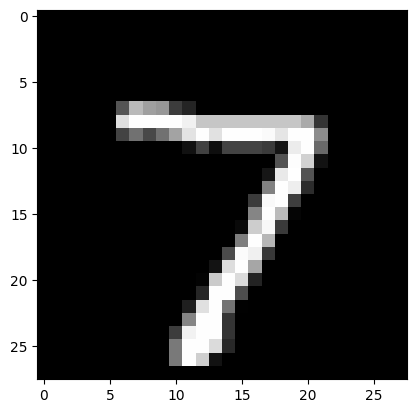

In [ ]:
plt.imshow(test_data[0][0].squeeze(dim=0), cmap="gray")

In [ ]:
logit=model_gpu(test_data[0][0].unsqueeze(dim=0).to(device))
label=torch.softmax(logit, dim=1).argmax(dim=1)
label

tensor([7])

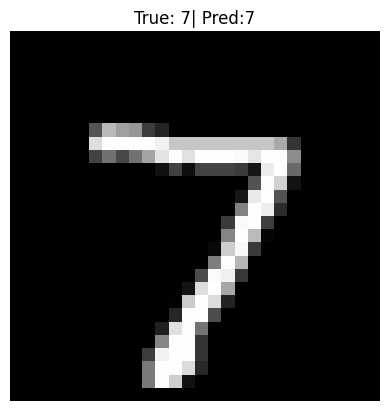

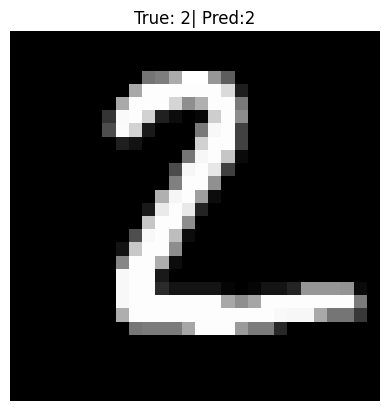

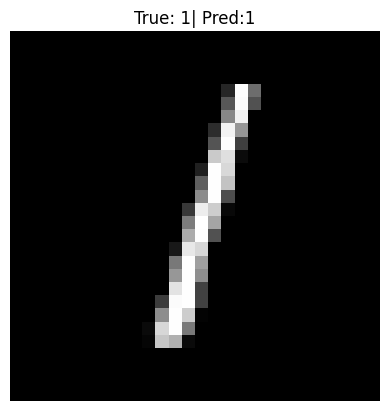

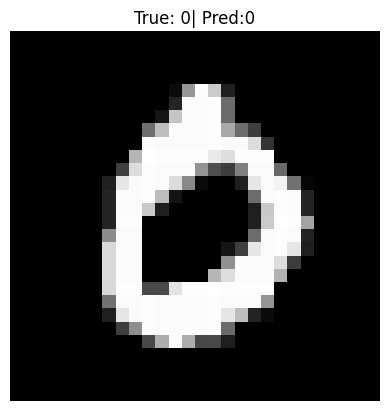

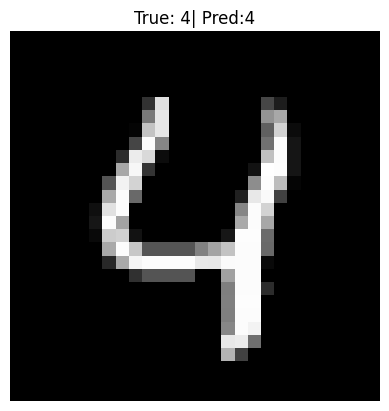

In [ ]:
for i in range(5):

  img=test_data[i][0]
  true_label=test_data[i][1]
  pred_logit=model_gpu(img.unsqueeze(dim=0).to(device))
  pred_label=torch.softmax(pred_logit, dim=1).argmax(dim=1)
  plt.figure()
  plt.imshow(img.squeeze(dim=0), cmap="gray")
  plt.title(f"True: {true_label}| Pred:{pred_label.item()}")
  plt.axis(False)


In [23]:
pip install torchmetrics

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [24]:
import torchmetrics
import mlxtend
torchmetrics.__version__, mlxtend.__version__

('1.4.1', '0.23.1')

In [25]:
from tqdm.auto import tqdm

model_gpu.eval()
test_pred=[]

with torch.inference_mode():
  for batch, (X,y) in tqdm(enumerate(test_dataloader)):
    X,y=X.to(device), y.to(device)
    y_logit=model_gpu(X)
    y_pred=torch.argmax(torch.softmax(y_logit, dim=1), dim=1)
    test_pred.append(y_pred)
  test_pred=torch.cat(test_pred)

test_pred[:5]


0it [00:00, ?it/s]

tensor([7, 2, 1, 0, 4])

In [26]:
len(test_data.targets), len(test_pred)

(10000, 10000)

In [27]:
test_data.targets[:7], test_pred[:7]

(tensor([7, 2, 1, 0, 4, 1, 4]), tensor([7, 2, 1, 0, 4, 1, 4]))

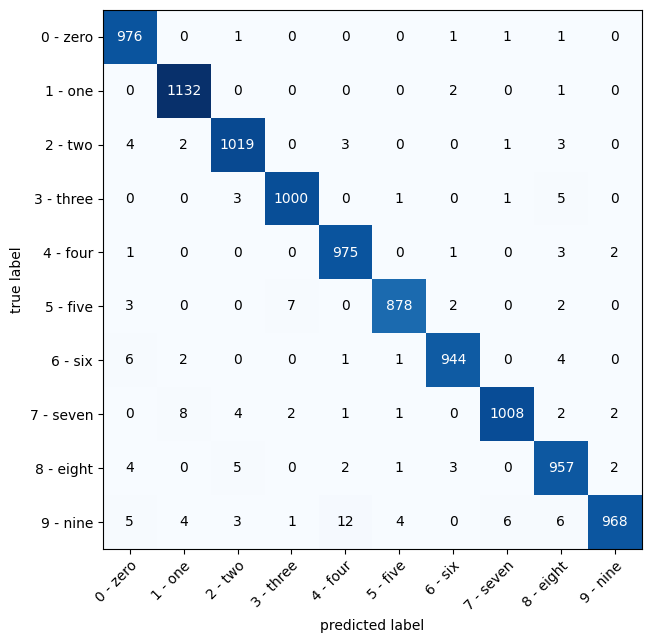

In [28]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

cmat=ConfusionMatrix(task="multiclass", num_classes=len(class_name))
confmat_tensor=cmat(preds=test_pred.cpu(), target=test_data.targets)

fig, ax=plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_name,
    figsize=(10,7)
)

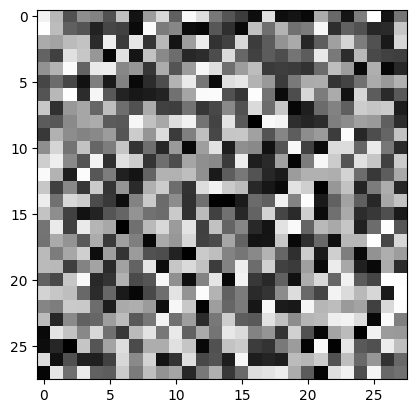

In [33]:
#just testing


import torch
import matplotlib.pyplot as plt
img_1=torch.rand(size=(1,28,28))
plt.imshow(img_1.squeeze(dim=0), cmap="gray")

In [39]:
torch.argmax(torch.softmax(model_cpu(img_1.unsqueeze(dim=0)), dim=1), dim=1)

tensor([2])

#FashionMNIST dataset

In [40]:
fashion_train=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

fashion_test=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)


100%|██████████| 26421880/26421880 [00:01<00:00, 16512839.38it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 279269.54it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5203985.75it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4827247.26it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [41]:
fashion_train, fashion_test

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [42]:
len(fashion_train), len(fashion_test)

(60000, 10000)

In [50]:
fashion_class_name=fashion_train.classes
fashion_class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [49]:
fashion_train[0][0].shape, fashion_train[0][1]

(torch.Size([1, 28, 28]), 9)

(-0.5, 27.5, 27.5, -0.5)

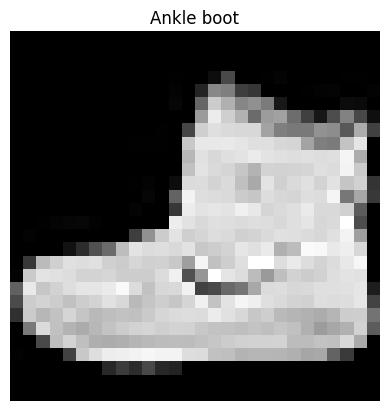

In [52]:
plt.imshow(fashion_train[0][0].squeeze(dim=0), cmap="gray")
plt.title(fashion_class_name[fashion_train[0][1]])
plt.axis(False)

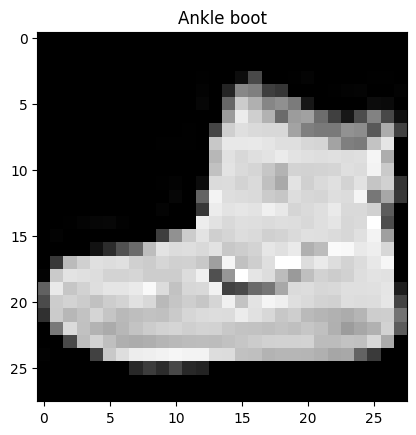

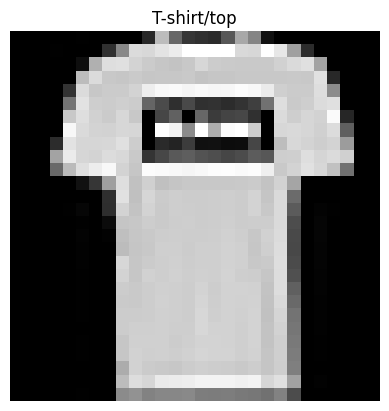

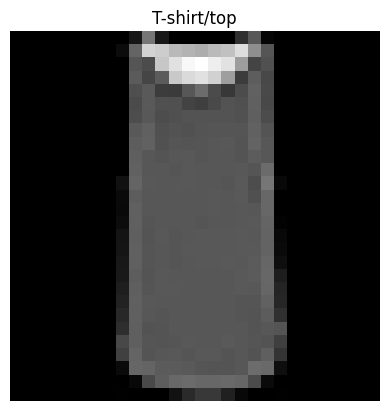

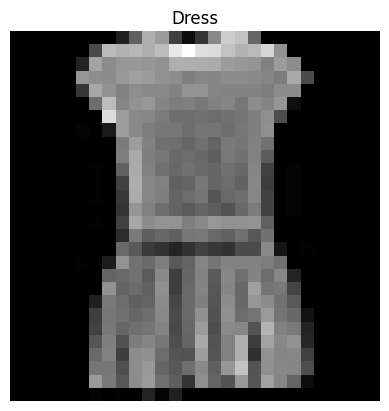

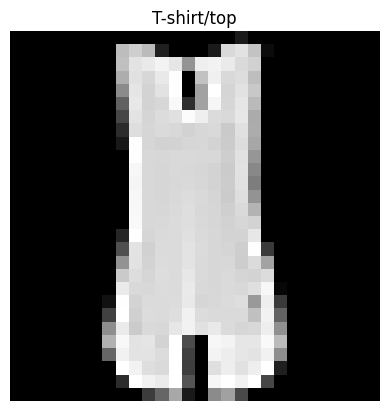

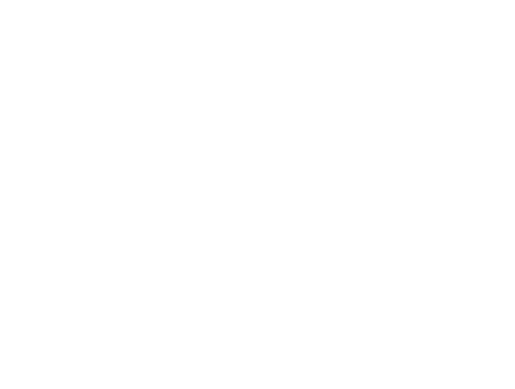

In [54]:
for i in range(5):
  img=fashion_train[i][0].squeeze(dim=0)
  lab=fashion_train[i][1]
  plt.imshow(img, cmap="gray")
  plt.title(fashion_class_name[lab])
  plt.figure()
  plt.axis(False)

In [56]:
fashion_train_dataloader=DataLoader(
    fashion_train,
    batch_size=32,
    shuffle=True
)

fashion_test_dataloader=DataLoader(
    fashion_test,
    batch_size=32,
    shuffle=False
)

fashion_train_dataloader, fashion_test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e11880d8040>,
 <torch.utils.data.dataloader.DataLoader at 0x7e11880da140>)

In [61]:
len(fashion_train_dataloader), len(fashion_test_dataloader)

(1875, 313)

In [65]:
for sample in next(iter(fashion_train_dataloader)):
  print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [67]:
model_gpu

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [68]:
%%time

from tqdm.auto import tqdm

epochs=5

train_loss=0

for epoch in tqdm(range(epochs)):
  for batch, (X_train,y_train) in enumerate(fashion_train_dataloader):

    X_train, y_train=X_train.to(device), y_train.to(device)

    model_gpu.train()

    y_pred=model_gpu(X_train)

    tr_loss=loss_fn(y_pred, y_train)

    train_loss+=tr_loss

    optimizer.zero_grad()

    tr_loss.backward()

    optimizer.step()

  train_loss/=len(fashion_train_dataloader)

  model_gpu.eval()

  test_loss=0

  with torch.inference_mode():

    for batch, (X_test, y_test) in enumerate(fashion_test_dataloader):

      X_test, y_test=X_test.to(device), y_test.to(device)

      y_pred=model_gpu(X_test)

      te_loss=loss_fn(y_pred, y_test)

      test_loss+=te_loss

    test_loss/=len(fashion_test_dataloader)

  print(f"Epoch: {epoch}| Train loss: {train_loss} | Test loss: {test_loss}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0| Train loss: 0.5037969350814819 | Test loss: 0.39671680331230164
Epoch: 1| Train loss: 0.3439532518386841 | Test loss: 0.342436820268631
Epoch: 2| Train loss: 0.30584952235221863 | Test loss: 0.32252082228660583
Epoch: 3| Train loss: 0.28885364532470703 | Test loss: 0.306179016828537
Epoch: 4| Train loss: 0.2756821811199188 | Test loss: 0.3005034327507019
CPU times: user 4min 30s, sys: 758 ms, total: 4min 31s
Wall time: 4min 32s


In [69]:
fashion_test.targets[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [70]:
model_gpu.eval()

y_preds=[]

with torch.inference_mode():

  for batch, (X,y) in enumerate(fashion_test_dataloader):

    y_logit=model_gpu(X)
    y_labels=torch.argmax(torch.softmax(y_logit, dim=1), dim=1)
    y_preds.append(y_labels)

y_preds=torch.cat(y_preds).to("cpu")

In [72]:
y_preds[:10], fashion_test.targets[:10]

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]),
 tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]))

In [76]:
import numpy as np

wrong_idx=np.where(y_preds!=fashion_test.targets)[0]
wrong_idx

array([  12,   23,   25, ..., 9979, 9989, 9999])

In [77]:
len(wrong_idx)

1066

In [79]:
fashion_test.targets[12], y_preds[12]

(tensor(7), tensor(5))

In [83]:
list(wrong_idx)[0]

12

In [89]:
import random

random_samples=random.sample(list(wrong_idx), k=10)
random_samples

[3625, 3522, 9537, 8879, 4192, 3987, 3038, 736, 4960, 2071]

<ipython-input-94-c43ce2044d3d>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,4,i+1)


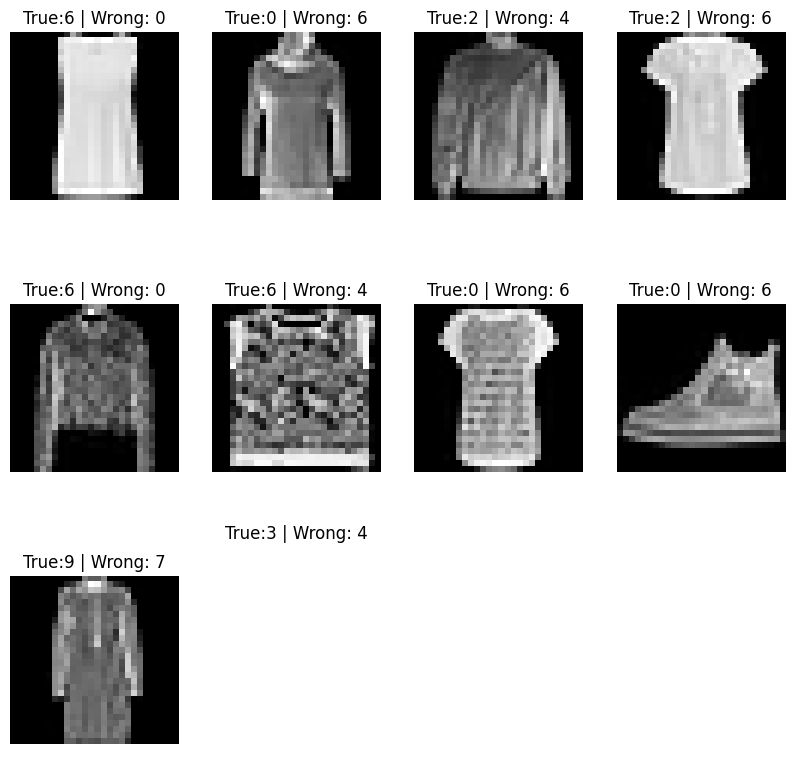

In [94]:
plt.figure(figsize=(10,10))
for i, idx in enumerate(random_samples):
  img=fashion_test[idx][0]
  true_lab=fashion_test[idx][1]
  wrong_lab=y_preds[idx]
  plt.imshow(img.squeeze(dim=0), cmap="gray")
  plt.subplot(3,4,i+1)
  plt.title(f"True:{true_lab} | Wrong: {wrong_lab}")
  plt.axis(False)
